In [1]:
"""
Group Members:
  Jonathan Harsy
  Sean Poston
"""
import pandas as pd

In [5]:
df = pd.read_csv('./data.csv')
df

,ID,XCoord,YCoord,Competitor
0,111,0.943354,-0.184819,Bob
1,92,0.121557,-0.927656,Bob
2,20,0.818485,0.375437,Bob
3,75,0.867462,-0.159851,Sue
4,10,-0.817321,-0.373419,Kate
...,...,...,...,...
145,176,-0.205276,0.822631,Mark
146,49,-0.594177,-0.560983,Sue
147,59,-0.843119,-0.360229,Bob
148,104,0.327192,-0.631842,Kate


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X = df[['XCoord', 'YCoord']].values
y = df['Competitor'].values

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = \
                          train_test_split(X, y,
                                           test_size = 0.2,
                                           random_state = 1,
                                           stratify = y)

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'entropy',
                              max_depth = None,
                              random_state = 1)

bag = BaggingClassifier(base_estimator = tree,
                        n_estimators = 500,
                        max_samples = 1.0,
                        max_features = 1.0,
                        bootstrap = True,
                        bootstrap_features = False,
                        n_jobs = 1,
                        random_state = 1)                            

In [12]:
from sklearn.metrics import accuracy_score

tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print("""Decision tree train accuracy: %.3f
Decision tree test accuracy:  %.3f""" % (tree_train, tree_test))

Decision tree train accuracy: 1.000
Decision tree test accuracy:  0.733


In [13]:
bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print("""Bagging train accuracy: %.3f
Bagging test accuracy:  %.3f""" % (bag_train, bag_test))

Bagging train accuracy: 1.000
Bagging test accuracy:  0.767


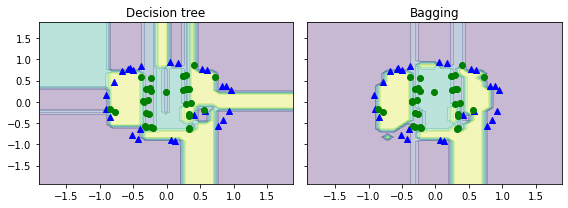

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(nrows = 1, ncols = 2, 
                        sharex = 'col', 
                        sharey = 'row', 
                        figsize = (8, 3))


for idx, clf, tt in zip([0, 1],
                        [tree, bag],
                        ['Decision tree', 'Bagging']):
    clf.fit(X_train, y_train)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train == 0, 0],
                       X_train[y_train == 0, 1],
                       c = 'blue', marker = '^')

    axarr[idx].scatter(X_train[y_train == 1, 0],
                       X_train[y_train == 1, 1],
                       c = 'green', marker = 'o')

    axarr[idx].set_title(tt)

plt.tight_layout()
plt.show()